# Modeling and Simulation in Python

Chapter 10

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_csv, read_html

### Under the hood

To get a `DataFrame` and a `Series`, I'll read the world population data and select a column.

`DataFrame` and `Series` contain a variable called `shape` that indicates the number of rows and columns.

In [2]:
table2 = read_csv('../World_population_estimates2.csv')

,Year,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
0,1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1,1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
62,2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2015,7247892788,7.336435e+09,7.349472e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
table2.shape

(67, 12)

In [4]:
census = table2.census / 1e9
census.shape

(67,)

In [5]:
un = table2.un / 1e9
un.shape

(67,)

A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [6]:
table2.index

RangeIndex(start=0, stop=67, step=1)

And `columns`, which labels the columns.

In [7]:
table2.columns

Index(['Year', 'census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben',
       'mj', 'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [8]:
table2.values

array([[1950, 2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [1951, 2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1952, 2636772306, nan, 2619292068.0, 2617949000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1953, 2682053389, nan, 2665865392.0, 2665959000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1954, 2730228104, nan, 2713172027.0, 2716927000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1955, 2782098943, nan, 2761650981.0, 2769074000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1956, 2835299673, nan, 2811572031.0, 2822502000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1957, 2891349717, nan, 2863042795.0, 2879934000.0, nan, nan, nan,
        nan, nan, nan, nan],
       [1958, 2948137248, nan, 2916030167.0, 2939254000.0, nan, nan, nan,
        nan, nan, nan, nan],
  

A `Series` does not have `columns`, but it does have `name`.

In [9]:
census.name

'census'

It contains `values`, which is an array.

In [10]:
census.values

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.85858475, 6.93599949, 7.01387131, 7.09212809, 7.16996819,
       7.24789279, 7.32599671])

And it contains `index`:

In [11]:
census.index

RangeIndex(start=0, stop=67, step=1)

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [12]:
type(table2)

pandas.core.frame.DataFrame

In [13]:
type(table2.index)

pandas.core.indexes.range.RangeIndex

In [14]:
type(table2.columns)

pandas.core.indexes.base.Index

In [15]:
type(table2.values)

numpy.ndarray

In [16]:
type(census)

pandas.core.series.Series

In [17]:
type(census.index)

pandas.core.indexes.range.RangeIndex

In [18]:
type(census.values)

numpy.ndarray

## Optional exercise

The following exercise provides a chance to practice what you have learned so far, and maybe develop a different growth model.  If you feel comfortable with what we have done so far, you might want to give it a try.

**Optional Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

Select `tables[1]`, which is the second table on the page.

In [38]:
filename = 'https://en.wikipedia.org/wiki/Estimates_of_historical_world_population'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table1 = tables[1]
table1.columns = ['prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark', 'gapminder']

In [39]:
tables[1]

,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark,gapminder
Year,,,,,,,,,,,
−10000,NaN,NaN,NaN,2M[25],NaN,NaN,4.0,1–10M,NaN,NaN,4.0
−9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
−8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN,NaN
−7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
−6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
−5000,NaN,NaN,NaN,18M[25],NaN,NaN,5.0,5–20M,NaN,NaN,5.0
−4000,NaN,NaN,NaN,28.,NaN,NaN,7.0,NaN,NaN,NaN,7.0
−3000,NaN,NaN,NaN,45.,NaN,NaN,14.0,NaN,NaN,NaN,14.0
−2000,NaN,NaN,NaN,72.,NaN,NaN,27.0,NaN,NaN,NaN,27.0


Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [40]:
del table1['gapminder']
table1.tail()

,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Again, we'll replace the long column names with more convenient abbreviations.

In [41]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [42]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

In [43]:
table1.head()

,PRB,UN,Maddison,HYDE,Tanton,Biraben,McEvedy & Jones,Thomlinson,Durand,Clark
Year,,,,,,,,,,
−10000,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
−9000,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
−8000,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
−7000,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
−6000,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN


Here are the results.  Notice that we are working in millions now, not billions.

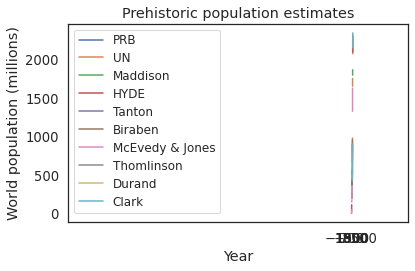

In [46]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small')

We can use `xlim` to zoom in on everything after Year 0.

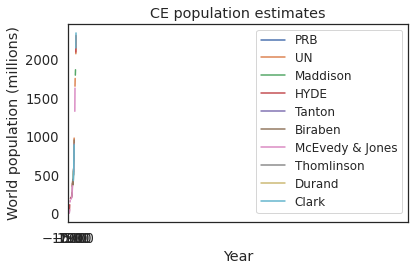

In [50]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')
plt.legend(fontsize='small')

Try as I might, I cannot fix this error in the x axis.  The most recent solution I can find for this (and reference to the problem) is from 2016... way back in python 2.7.  I have been working on this for hours, and I have to cut my losses and move on.